In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [30]:
results_path = "/Users/alex/Documents/llm-articulation/results.csv"
results = pd.read_csv(results_path)
results.head()

,model,task,shot,task description,accuracy
0,text-ada-001,french,0,False,0.030100
1,text-ada-001,french,1,False,0.010033
2,text-ada-001,french,2,False,0.123746
3,text-ada-001,french,3,False,0.076923
4,text-ada-001,french,4,False,0.397993


In [15]:
shots = list(range(7))

model = "text-ada-001"
task = 'french'
task_desciption = False

def get_results(model, task, task_description):
    return list(results[(results["model"] == model) & (results["task"] == task) & (results["task description"] == task_description)]['accuracy'])

acc = results[(results["model"] == model) & (results["task"] == task) & (results["task description"] == task_desciption)]['accuracy']
print(list(acc))
print(shots)


[0.0301003344481605, 0.0100334448160535, 0.1237458193979933, 0.0769230769230769, 0.3979933110367893, 0.294314381270903, 0.3779264214046823]
[0, 1, 2, 3, 4, 5, 6]
[0.0301003344481605, 0.0100334448160535, 0.1237458193979933, 0.0769230769230769, 0.3979933110367893, 0.294314381270903, 0.3779264214046823]


In [4]:
CB91_Blue = "#2CBDFE"
CB91_Green = "#47DBCD"
CB91_Pink = "#F3A0F2"
CB91_Purple = "#9D2EC5"
CB91_Violet = "#661D98"
CB91_Amber = "#F5B14C"

models = ["text-ada-001", "text-babbage-001", "text-curie-001", "text-davinci-002"]
colours = [CB91_Purple, CB91_Amber, CB91_Green, CB91_Pink]

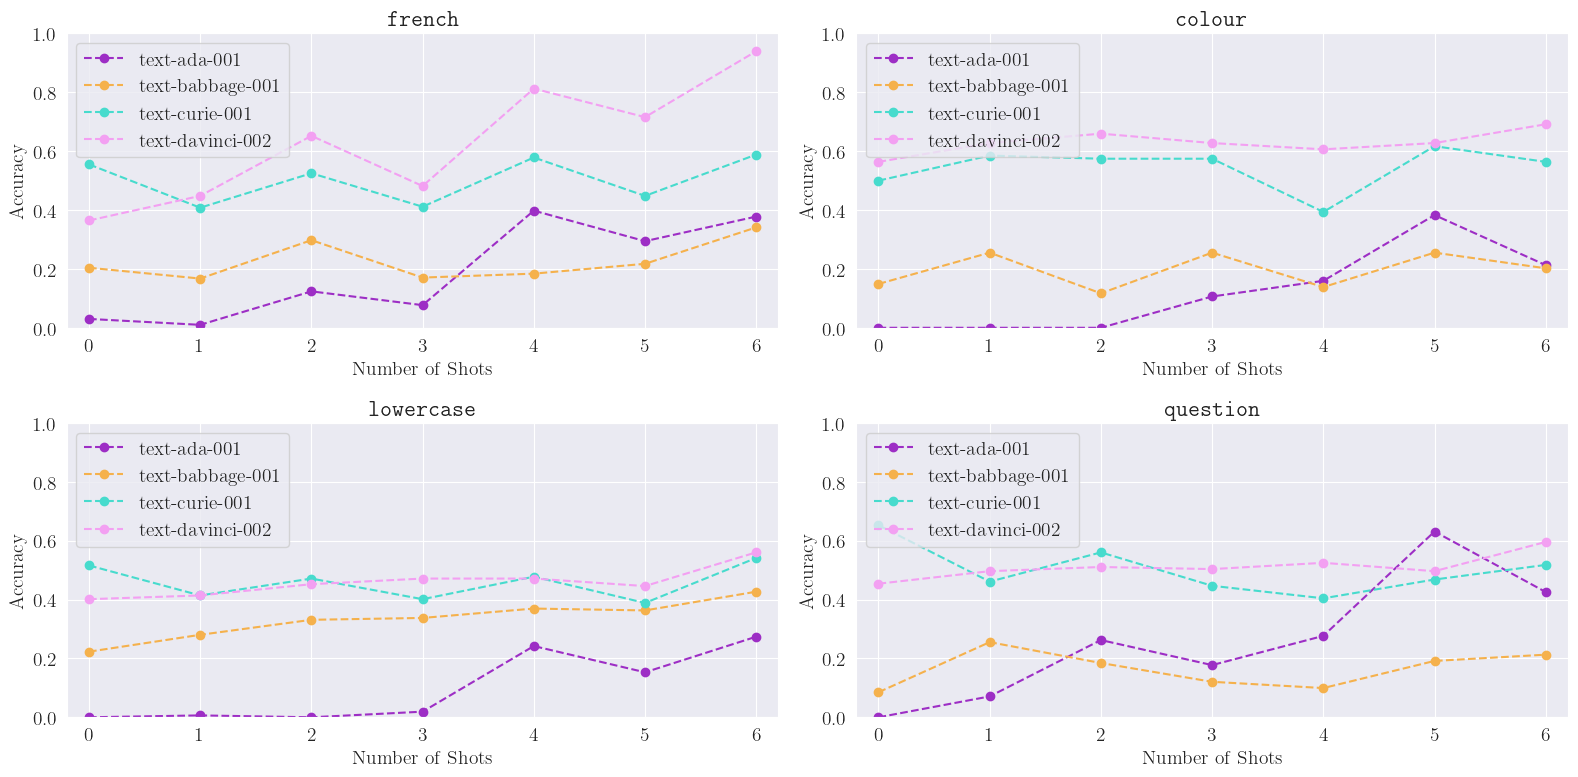

In [29]:
sns.set_style('darkgrid')
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
matplotlib.rcParams["font.serif"] = "Times New Roman"
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams['text.usetex'] = True

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
ax1, ax2, ax3, ax4 = axes.flatten()


ax1.set_title(r"$\texttt{french}$")
ax2.set_title(r"$\texttt{colour}$")
ax3.set_title(r"$\texttt{lowercase}$")
ax4.set_title(r"$\texttt{question}$")

for i, model in enumerate(models):

    acc = get_results(model, "french", False)
    ax1.plot(shots, acc, label=model, color=colours[i],marker='o',linestyle='dashed')
    acc = get_results(model, "colour", False)
    ax2.plot(shots, acc, label=model, color=colours[i],marker='o',linestyle='dashed')
    acc = get_results(model, "lowercase", False)
    ax3.plot(shots, acc, label=model, color=colours[i],marker='o',linestyle='dashed')
    acc = get_results(model, "question", False)
    ax4.plot(shots, acc, label=model, color=colours[i],marker='o',linestyle='dashed')

for ax in axes.flatten():
    ax.set_xlabel("Number of Shots")
    ax.set_ylabel("Accuracy")
    ax.legend(loc='upper left')
    
plt.setp(
    axes.flatten(),
    xlim=(-0.2, 6.2),
    ylim=(0, 1),
)

plt.tight_layout()
plt.savefig("no_description_results.pdf")
plt.show()

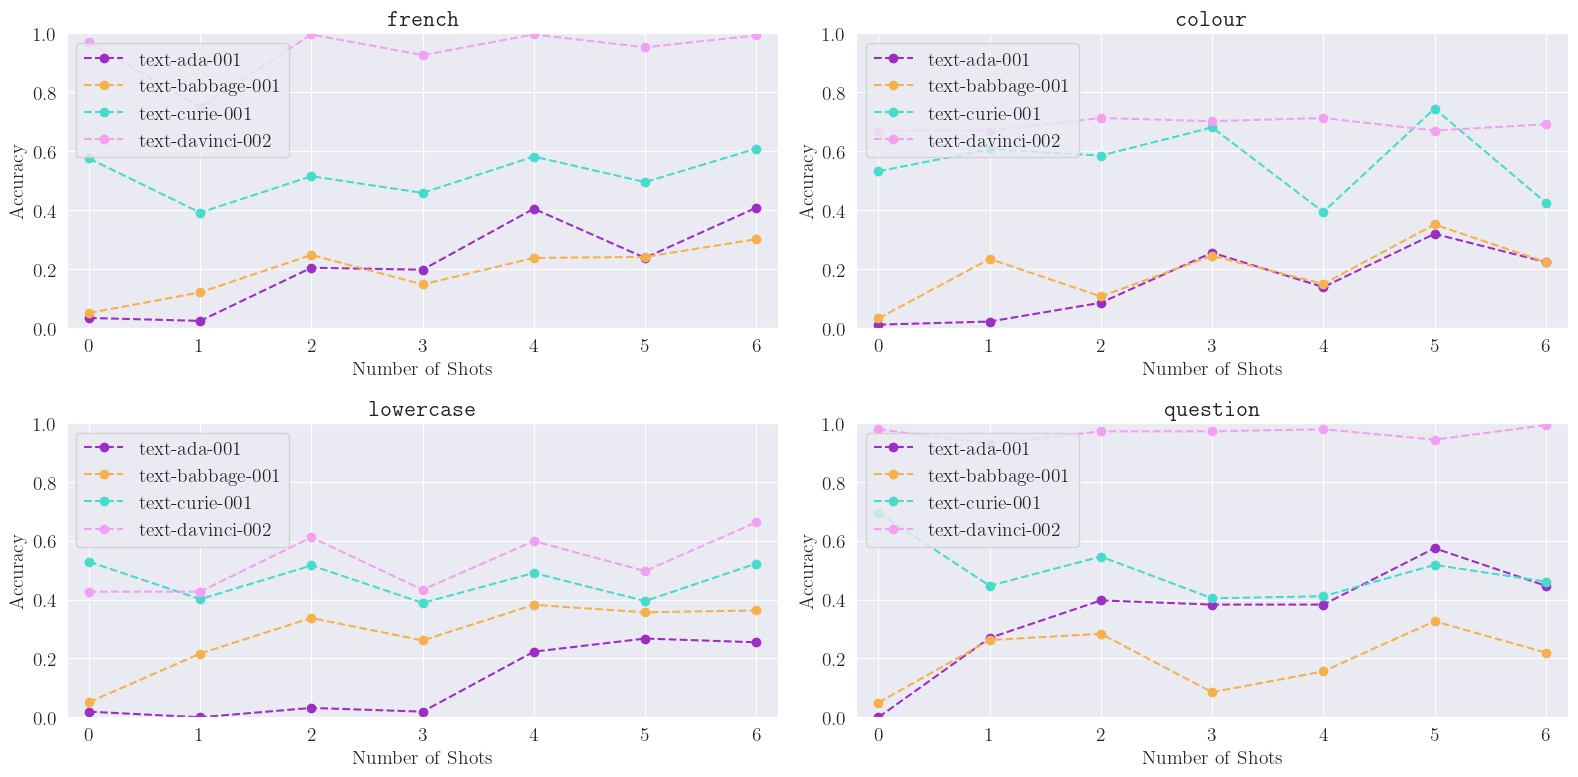

In [31]:
sns.set_style('darkgrid')
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
matplotlib.rcParams["font.serif"] = "Times New Roman"
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams['text.usetex'] = True

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
ax1, ax2, ax3, ax4 = axes.flatten()


ax1.set_title(r"$\texttt{french}$")
ax2.set_title(r"$\texttt{colour}$")
ax3.set_title(r"$\texttt{lowercase}$")
ax4.set_title(r"$\texttt{question}$")

for i, model in enumerate(models):

    acc = get_results(model, "french", True)
    ax1.plot(shots, acc, label=model, color=colours[i],marker='o',linestyle='dashed')
    acc = get_results(model, "colour", True)
    ax2.plot(shots, acc, label=model, color=colours[i],marker='o',linestyle='dashed')
    acc = get_results(model, "lowercase", True)
    ax3.plot(shots, acc, label=model, color=colours[i],marker='o',linestyle='dashed')
    acc = get_results(model, "question", True)
    ax4.plot(shots, acc, label=model, color=colours[i],marker='o',linestyle='dashed')

for ax in axes.flatten():
    ax.set_xlabel("Number of Shots")
    ax.set_ylabel("Accuracy")
    ax.legend(loc='upper left')
    
plt.setp(
    axes.flatten(),
    xlim=(-0.2, 6.2),
    ylim=(0, 1),
)

plt.tight_layout()
plt.savefig("description_results.pdf")
plt.show()

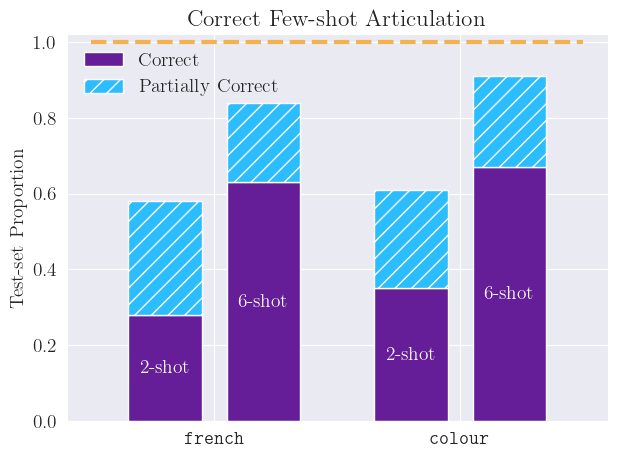

In [90]:
import numpy as np
labels = [r"$\texttt{french}$",r"$\texttt{colour}$"]
six_correct = [0.63, 0.67]
six_partially = [0.21, 0.24]

two_correct = [0.28, 0.35]
two_partially = [0.30, 0.26]

X_axis = np.arange(len(labels))

width = 0.3

fig, ax = plt.subplots()

six = ax.bar(X_axis + 0.2, six_correct, width, label='Correct',color = CB91_Violet)
ax.bar(X_axis + 0.2, six_partially, width, bottom=six_correct,
       label='Partially Correct',color = CB91_Blue, hatch='//')

two = ax.bar(X_axis - 0.2, two_correct, width,color = CB91_Violet)
ax.bar(X_axis - 0.2, two_partially, width, bottom=two_correct,color = CB91_Blue, hatch='//')

ax.bar_label(six,labels= ["6-shot","6-shot"],label_type='center',color='white')
ax.bar_label(two,labels= ["2-shot","2-shot"],label_type='center',color='white')

ax.legend(loc='upper left',frameon=False)
ax.set_ylabel('Test-set Proportion')
ax.set_title('Correct Few-shot Articulation')
ax.set_xticks(X_axis, labels)
ax.hlines(1.0, -0.5, 1.5, linestyles='dashed', colors=CB91_Amber,linewidth=3.0)

plt.setp(ax, ylim=(0, 1.02))
plt.tight_layout()
plt.savefig("few_shot_art.pdf")
plt.show()